<a href="https://colab.research.google.com/github/Katya-1337/Projects/blob/main/project_%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Импорт библиотек и всего нужного из Keras

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Импорт tf.keras как часть установки TensorFlow:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#импорт всего нужного из keras
from typing import Sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [ ]:
file_data = pd.read_csv("/content/drive/MyDrive/water_potability.csv")
file_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
cols = list(file_data.columns)
cols.remove("Potability")
print("Базылева Е.А. Параметры, которые будут использоваться в исследовании: ")
for i, col in enumerate(cols):
  print(f'{i+1}. {col}')

Базылева Е.А. Параметры, которые будут использоваться в исследовании: 
1. ph
2. Hardness
3. Solids
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity


In [ ]:
print('ОРИГИНАЛЬНЫЙ ФАЙЛ Original DataFrame\n', file_data)
print('___________________________________________________')
file_data = file_data.fillna(0)
print('\n МОДИФИЦИРОВАННЫЙ ФАЙЛ БЕЗ NaN - Modified DataFrame\n', file_data)

ОРИГИНАЛЬНЫЙ ФАЙЛ Original DataFrame
             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.

# **ПРЕДИКТОР И ОТКЛИК**

In [ ]:
y = file_data['Potability']                #это Отклик, ЦЕЛЬ. Вектор y
x = file_data.drop('Potability', axis = 1) # это Предиктор - это вся таблица X, кроме Y
                                           #"ось" (axis) и "ось" (axes)
print(y)
print(x)

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64
            ph    Hardness        Solids  Chloramines     Sulfate  \
0     0.000000  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    0.000000   
2     8.099124  224.236259  19909.541732     9.275884    0.000000   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    0.000000   
3273  9.419510  175.762646  33155.578218     7.350233    0.000000   
3274  5.126763  230.603758  11983.869376     6.303357    0.000000   
3275  7.874671  195.102299  17404.177061     7.509306    0.000000   

      Conductivi

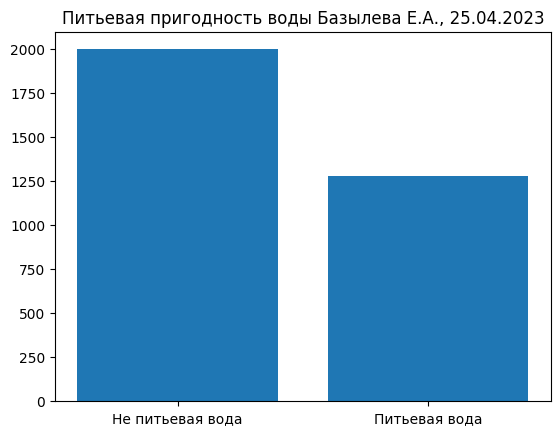

In [ ]:
import matplotlib.pyplot as plt#импорт библиотек

plt.title("Питьевая пригодность воды Базылева Е.А., 25.04.2023")
df = list(file_data["Potability"].values)
pot = [0,0]
keys = ["Не питьевая вода", "Питьевая вода"]
for i in df:
  pot[i] += 1
plt.bar(range(2), pot, tick_label = keys)
plt.show()

#Тестовая и обучающая выборки


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 12345, test_size = 0.28)

print(x_train)

            ph    Hardness        Solids  Chloramines     Sulfate  \
586   6.499068  173.768874  23734.846211     9.009056  330.164682   
984   0.000000  238.409598  26493.076207     8.669944  311.553679   
2774  7.288113  216.612475  18979.981692     7.668510  358.978620   
1318  6.724639  223.175415  41552.019664     7.744700  271.157120   
2474  4.964070  168.283365  17694.574833     9.725321  333.639511   
...        ...         ...           ...          ...         ...   
2817  8.247958  195.539536  28327.167338     5.378286  281.229853   
546   3.410360  207.397473  49074.730407     5.667433  301.975011   
382   5.772718  213.363545  26124.931415     8.630719  273.279448   
2177  8.026773  169.333843  19168.526773     8.081496  405.527337   
482   7.705711  178.922858  18476.619166     8.226228  334.889911   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
586     593.561756       13.986294        63.693876   4.355880  
984     369.283864       11.759930       

#Преобразование Pandas в Numpy


In [ ]:
x_train = x_train.values
x_test = x_test.values
y_train =  y_train.values
y_test = y_test.values
x_test

array([[8.64953495e+00, 1.75426670e+02, 9.89802221e+03, ...,
        1.00692542e+01, 0.00000000e+00, 5.22980919e+00],
       [6.82393014e+00, 1.46130599e+02, 1.34678798e+04, ...,
        1.43076867e+01, 8.15295337e+01, 4.01614408e+00],
       [8.43329082e+00, 1.61195283e+02, 1.59042434e+04, ...,
        1.53037548e+01, 7.14785008e+01, 3.63154293e+00],
       ...,
       [0.00000000e+00, 1.70291426e+02, 1.45504170e+04, ...,
        1.37975777e+01, 5.14159096e+01, 3.79403311e+00],
       [6.01726092e+00, 2.06014400e+02, 1.51572688e+04, ...,
        1.42217570e+01, 5.33199772e+01, 4.42771228e+00],
       [6.66577420e+00, 1.55709679e+02, 3.06100479e+04, ...,
        1.51015327e+01, 7.97804669e+01, 4.90355322e+00]])

In [ ]:
y_train_bin = np_utils.to_categorical(y_train)
y_test_bin = np_utils.to_categorical(y_test)

y_train_bin[0:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

#Модель

In [ ]:
model = Sequential()

model.add(Dense(10, input_dim = 9, activation = 'relu')) #10 нейронов во входном слое, input = 10 -1
model.add(Dense(10, activation = 'relu')) #скрытый слой из 10 нейронов
model.add(Dense(2, activation = 'softmax')) #выходной слой из 2 нейронов

#Компиляция и обучение модели

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = "Adam", metrics = ["accuracy"])

In [ ]:
print("Базылева Е.А 02.05.2023      Обучение модели на train данных:")
history = model.fit(x_train, y_train_bin, epochs = 10, batch_size= 5)

Базылева Е.А 02.05.2023      Обучение модели на train данных:
Epoch 1/10
472/472 [==============================] - 3s 4ms/step - loss: 32.9352 - accuracy: 0.5466
Epoch 2/10
472/472 [==============================] - 2s 3ms/step - loss: 9.1445 - accuracy: 0.5059
Epoch 3/10
472/472 [==============================] - 1s 2ms/step - loss: 8.6697 - accuracy: 0.5237
Epoch 4/10
472/472 [==============================] - 1s 2ms/step - loss: 8.1427 - accuracy: 0.5263
Epoch 5/10
472/472 [==============================] - 1s 2ms/step - loss: 8.8649 - accuracy: 0.5221
Epoch 6/10
472/472 [==============================] - 1s 2ms/step - loss: 8.1238 - accuracy: 0.5276
Epoch 7/10
472/472 [==============================] - 1s 2ms/step - loss: 7.5922 - accuracy: 0.5250
Epoch 8/10
472/472 [==============================] - 1s 2ms/step - loss: 10.6839 - accuracy: 0.5182
Epoch 9/10
472/472 [==============================] - 1s 2ms/step - loss: 7.4426 - accuracy: 0.5233
Epoch 10/10
472/472 [===============

In [ ]:
print("Базылева Е.А 02.05.2023")
print('Оценка модели на тестовых данных:')
scores = model.evaluate(x_test, y_test_bin)
print("\nAccuracy (Точность модели): %.2f%%" % (scores[1]*100))

print("Функция потерь тестовой выборки и тгочность модели по тестовой выборке:")
print('test loss, test accuracy:', scores)

Базылева Е.А 02.05.2023
Оценка модели на тестовых данных:
29/29 [==============================] - 0s 1ms/step - loss: 9.2004 - accuracy: 0.3780

Accuracy (Точность модели): 37.80%
Функция потерь тестовой выборки и тгочность модели по тестовой выборке:
test loss, test accuracy: [9.200422286987305, 0.37799564003944397]


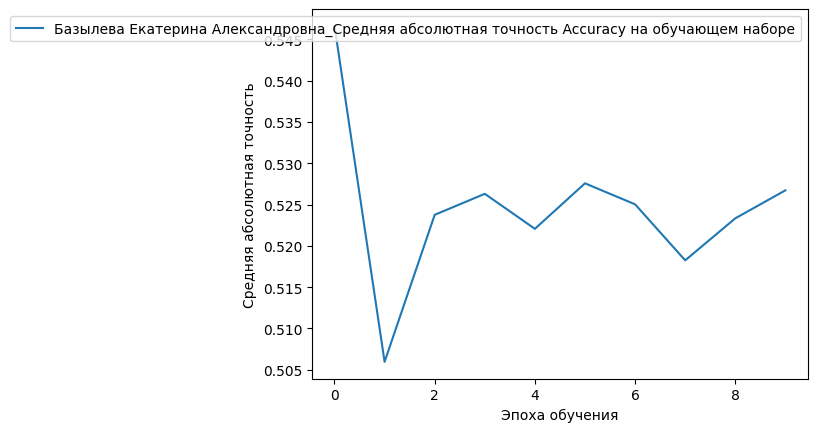

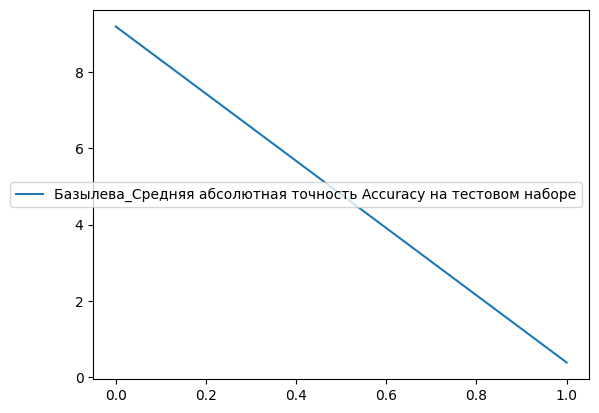

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) #первая строка, первый столбец, первая ячейка в сетке figure

plt.plot(history.history['accuracy'], label = 'Базылева Екатерина Александровна_Средняя абсолютная точность Accuracy на обучающем наборе')

#Добавляем подписи к осям
plt.xlabel('Эпоха обучения')
ax.set_ylabel("Средняя абсолютная точность")
plt.legend()
plt.show()

#График для тестовой выборки
plt.plot(scores, label = 'Базылева_Средняя абсолютная точность Accuracy на тестовом наборе')
plt.legend()
plt.show()